In [2]:
import sympy as sp

In [29]:
zsng,zsnd,zpn,zp,zs = sp.symbols("Z_sng Z_snd Z_pn Z_p Z_s")

In [4]:
dn = zsnd+zpn+zp
za = zsnd*zpn/dn
zb = zsnd*zp/dn
zc = zpn*zp/dn

In [27]:
z_simpl = (zb+zsnd)*(zc+zpn)/(zb+zsnd+zc+zpn)
z_simpl = sp.factor(z_simpl +za)

In [32]:
zeq = 2*zsng + z_simpl
zeq

2*Z_pn*Z_snd/(Z_pn + Z_snd) + 2*Z_sng

In [45]:
z_simpl_2 = 2*zc*(2*zb+zs)/(2*zc+2*zc+zs)
sp.factor(z_simpl_2)+(2*za+2*zsng)

2*Z_p*Z_pn*(Z_p*Z_s + 2*Z_p*Z_snd + Z_pn*Z_s + Z_s*Z_snd)/((Z_p + Z_pn + Z_snd)*(4*Z_p*Z_pn + Z_p*Z_s + Z_pn*Z_s + Z_s*Z_snd)) + 2*Z_pn*Z_snd/(Z_p + Z_pn + Z_snd) + 2*Z_sng

In [46]:
za = zs+2*zp
zc = (zs**2+2*zp*zs)/zp
sp.factor(zc*2*za/(zc+2*za))

2*Z_s

In [9]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [60]:
vin, iin, iout, ik, N, yc, n = sp.symbols("V_in I_in I_out ik N Y_c n")
vm = vin/(1-sp.exp(ik*N))
vp = vin/(1-sp.exp(-ik*N))

im = (-iin*sp.exp(-ik*N) + iout*sp.exp(-ik))/(2*sp.sinh(ik*(N-1))) - yc*(N-1)*vin/(sp.exp(ik)+sp.exp(ik*N))
ip = (iin*sp.exp(ik*N) - iout*sp.exp(ik))/(2*sp.sinh(ik*(N-1))) + yc*(N-1)*vin/(sp.exp(-ik)+sp.exp(-ik*N))

vn = vp*sp.exp(-ik*n)+vm*sp.exp(ik*n)
i_n = ip*sp.exp(-ik*n)+im*sp.exp(ik*n)

In [64]:
expr1 = ip/vp+im/vm
expr2 = ip/vp-im/vm

In [67]:
expr1 = sp.simplify(expr1)
expr1

(exp(N*ik) - 1)*(I_in*exp(2*ik) + I_in*exp(ik*(N + 1)) + I_in*exp(ik*(N + 2)) + I_in*exp(ik*(2*N + 1)) - I_out*exp(3*ik) - I_out*exp(2*N*ik) - I_out*exp(ik*(N + 1)) - I_out*exp(ik*(N + 2)) + 2*N*V_in*Y_c*exp(ik*(N + 1))*sinh(ik*(N - 1)) + 2*N*V_in*Y_c*exp(ik*(N + 2))*sinh(ik*(N - 1)) - 2*V_in*Y_c*exp(ik*(N + 1))*sinh(ik*(N - 1)) - 2*V_in*Y_c*exp(ik*(N + 2))*sinh(ik*(N - 1)))*exp(-ik*(N + 1))/(2*V_in*(exp(ik) + exp(N*ik))*sinh(ik*(N - 1)))

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [32]:
def lorentzian(_w, _wp, _width):
    return 1/(1+(2*(_w-_wp)/_width)**2)

[1.02618787 0.00256542]


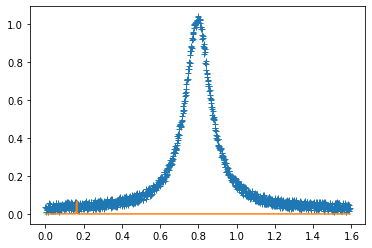

In [57]:
npts = 1000
ws = np.linspace(0, 10, npts)
y_to_fit = lorentzian(ws, 5, 1)+np.random.random(npts)/20
plt.plot(ws/2/np.pi, y_to_fit,"+")
popt, pcov = curve_fit(lorentzian, ws, y_to_fit)
print(popt)
plt.plot(ws/2/np.pi, lorentzian(ws, *popt))

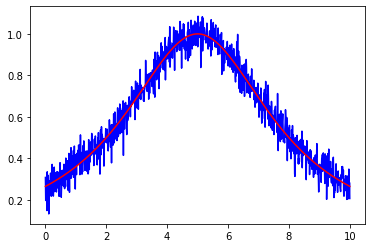

In [85]:
xdata = np.linspace(0, 10, 1000)*2*np.pi

y = lorentzian(xdata, 5*2*np.pi, 6*2*np.pi)

rng = np.random.default_rng()

y_noise = 0.05 * rng.normal(size=xdata.size)

ydata = y + y_noise

plt.plot(xdata/2/np.pi, ydata, 'b-', label='data')

popt, pcov = curve_fit(lorentzian, xdata, ydata)

plt.plot(xdata/2/np.pi, lorentzian(xdata, *popt), 'r-')